<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [1]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import datetime
import time
from tqdm import tqdm
import csv
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## YOUR CODE HERE

In [4]:
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script id="polyfill-script-bundle">
   /* Polyfill service DEVELOPMENT MODE - for live use set NODE_ENV to 'production'
 * Disable minification (remove `.min` from URL path) for more info */

(function(self, undefined) {function ArrayCreate(r){if(1/r==-Infinity&&(r=0),r>Math.pow(2,32)-1)throw new RangeError("Invalid array length");var n=[];return n.length=r,n}function Call(t,l){var n=arguments.length>2?arguments[2]:[];if(!1===IsCallable(t))throw new TypeError(Object.prototype.toString.call(t)+"is not a function.");return t.apply(l,n)}function Get(n,t){return n[t]}function HasOwnProperty(r,t){return Object.prototype.hasOwnProperty.call(r,t)}function HasProperty(n,r){return r in n}function IsArray(r){return"[object Array]"===Object.prototype.toString.call(r)}function IsCallable(n){return"function"==typeof n}function RequireObjectCoercible(e){if(null===e||e===undefin

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [6]:
## YOUR CODE HERE

In [7]:
# job_card = soup.find_all('table', attrs={'class':'jobCard_mainContent big6_visualChanges'})

In [8]:
def extract_location_from_result(result):
    try:
        j_location = result.find('div', attrs={'class':'companyLocation'}).text.strip()
    except:
        j_location = np.nan
    return j_location

def extract_company_from_result(result):
    try:
        j_company = result.find('span', attrs={'class':'companyName'}).text.strip()
    except:
        j_company = np.nan
    return j_company

def extract_title_from_result(result):
    try:
        j_title = result.find('h2', attrs={'class':'jobTitle jobTitle-color-purple'}).text.strip()
    except:
        j_title = np.nan
    return j_title

def extract_salary_from_result(result):
    try:
        j_salary = result.find('div', attrs={'class':'metadata salary-snippet-container'}).text.strip()
    except:
        j_salary = np.nan
    return j_salary

# def extract_rating_from_result(result):
#     try:
#         j_rating = result.find('span', attrs={'class':'ratingNumber'}).text.strip()
#     except:
#         j_rating = np.nan
#     return j_rating

# def extract_summary_from_result(result):
#     try:
#         j_summary = result.find('div', attrs={'class':'metadata salary-snippet-container'}).text.strip()
#     except:
#         j_summary = np.nan
#     return j_summary

In [9]:
print(extract_location_from_result(soup))
print(extract_company_from_result(soup))
print(extract_title_from_result(soup))
print(extract_salary_from_result(soup))
# print(extract_rating_from_result(soup))
# print(extract_summary_from_result(soup))

New York, NY 10001 (Chelsea area)•Remote
Rethink
Data Scientist - Dalio Center for Health Justice
$83,690 - $160,000 a year


Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

### Save your results as a CSV

In [10]:
YOUR_CITY = 'Southampton'

In [11]:
url_template = 'https://uk.indeed.com/jobs?q={}&l={}&start={}'
max_results_per_city = 1 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

cities = ['London', 'Birmingham']

roles = ['Data+Scientist','Data+Engineer']

results = []

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"}
#headers here has been used on/off to try to help scrape and avoid constant captcha

for city in tqdm(cities):
    for role in roles:
        for start in range(0, max_results_per_city, 10):
            # Grab the results from the request (as above)
            r = requests.get(url_template.format(role, city, start), headers=headers)
            soup = BeautifulSoup(r.text, 'html.parser')
            # Append to the full set of results
            results.append(soup)
            # sleep function used to slow down the scrape and avoid getting blocked from the page
            time.sleep(random.randint(3,7))
            
    # Outputting raw data for each city as csv
    now = (datetime.datetime.now().strftime('%d%B_%I%M%p'))
    filepathraw = f'/Users/garethharper/Desktop/GA_P2/DSI21-lessons/projects/project-4/raw/{now}.csv'
    with open(filepathraw,'w',newline='') as f:
        wr = csv.writer(f)
        wr.writerows(results)
    pass

100%|██████████| 2/2 [00:18<00:00,  9.26s/it]


In [12]:
# cities = ['London', 'Birmingham', 'Glasgow', 'Liverpool', 'Bristol', 
#           'Manchester', 'Sheffield', 'Leeds', 'Edinburgh', 'Leicester', 
#           'Coventry', 'Bradford', 'Cardiff', 'Belfast', 'Nottingham',
#           'Kingston', 'Newcastle', 'Derby', 'Portsmouth', YOUR_CITY]

# roles = ['Junior+Data+Scientist','Junior+Data+Engineer',
#          'Junior+Data+Consultant','Junior+Data+Analyst']

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [13]:
## YOUR CODE HERE

In [14]:
jobs_indeed = pd.DataFrame(columns=['location','company','job_title','salary'])

for result in tqdm(results):
    for item in result.find_all('div', attrs={'class':'job_seen_beacon'}):
        job_data = {'location': extract_location_from_result(item),
                     'company': extract_company_from_result(item),
                     'job_title': extract_title_from_result(item),
                     'salary': extract_salary_from_result(item)}
        jobs_indeed = jobs_indeed.append(job_data, ignore_index=True)
        
        # Outputting df formatted data to csv
        filepathdf = f'/Users/garethharper/Desktop/GA_P2/DSI21-lessons/projects/project-4/df/{now}.csv'
        jobs_indeed.to_csv(filepathdf, index=False, header=['location','company','job_title','salary'])

100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


In [15]:
jobs_indeed.head()

,location,company,job_title,salary
0,London,ByteDance,Machine Learning Engineer - Recommendation,"£33,894 - £92,797 a year"
1,London•Temporarily Remote,Noir Consulting,NaN,"£70,000 - £80,000 a year"
2,London•Remote,247 Global Recruit,NaN,£600 - £620 a day
3,London,KPMG,Data Scientist,NaN
4,London,Bupa,NaN,NaN


In [16]:
jobs_indeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   49 non-null     object
 1   company    49 non-null     object
 2   job_title  37 non-null     object
 3   salary     15 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


### Load in the the data of scraped salaries

In [17]:
## YOUR CODE HERE
path = r'/Users/garethharper/Desktop/GA_P2/DSI21-lessons/projects/project-4/df'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None)
    li.append(df)

df_jobs = pd.concat(li, axis=0, ignore_index=True)

In [18]:
df_jobs.head()

,location,company,job_title,salary
0,London SW1V 1PZ•Temporarily Remote,Pythia Sports,NaN,NaN
1,London•Remote,Simply Business,NaN,"£60,000 - £75,000 a year"
2,London,ByteDance,Machine Learning Engineer - Recommendation,"£33,894 - £92,797 a year"
3,London•Remote,Exposed Solutions Limited,NaN,NaN
4,London,The Commonwealth,NaN,NaN


In [19]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59263 entries, 0 to 59262
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   59263 non-null  object
 1   company    59192 non-null  object
 2   job_title  48230 non-null  object
 3   salary     23668 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [20]:
## YOUR CODE HERE

In [21]:
df_jobs.isnull().sum()

location         0
company         71
job_title    11033
salary       35595
dtype: int64

In [22]:
# remove all rows with no entries
df_jobs = df_jobs.dropna()

In [23]:
# only consider annual salaries (i.e. not hourly, daily, weekly or monthly)

# hour-long jobs
print('Hour jobs:', df_jobs[df_jobs.salary.str.contains('hour')].shape)
# day-long jobs
print('Day jobs:', df_jobs[df_jobs.salary.str.contains('day')].shape)
# week-long jobs
print('Week jobs:', df_jobs[df_jobs.salary.str.contains('week')].shape)
# month-long jobs
print('Month jobs:', df_jobs[df_jobs.salary.str.contains('month')].shape)
# year-long jobs
print('Year jobs:', df_jobs[df_jobs.salary.str.contains('year')].shape)

# now filtering for only those containing annual salary
df_jobs = df_jobs[df_jobs.salary.str.contains('year')]

Hour jobs: (703, 4)
Day jobs: (649, 4)
Week jobs: (25, 4)
Month jobs: (8, 4)
Year jobs: (15786, 4)


In [24]:
# remove duplicate entries
df_jobs.drop_duplicates(inplace=True)

In [25]:
df_jobs.shape

(2250, 4)

In [26]:
# some locations may be masking duplicates if the same job posting was pulled
# with a slightly different location.
# Therefore I will drop duplicates on all columns except location.
df_jobs.drop_duplicates(subset=['company','job_title','salary'], inplace=True)

In [27]:
df_jobs.shape
# this value is slightly less than the previous one so my hypothesis was correct

(2142, 4)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [28]:
## YOUR CODE HERE

In [29]:
def string_to_int(x):
    """Converts salary string to an integer, and averages if salary is a range"""
    # remove special characters:
    x = re.sub('[£,.a-zA-Z\s]','', x)
    # return value or average value
    try:
        lower, upper = x.split("-")
        x = (int(lower) + int(upper))/2
    except:
        x = x
    return x

In [30]:
df_jobs['salary'] = df_jobs.salary.apply(string_to_int)

In [31]:
df_jobs.head()

,location,company,job_title,salary
2,London,ByteDance,Machine Learning Engineer - Recommendation,63345.5
5,London SE1 0AT,Fable Data,Data Scientist,55000
18,London,Karshare,Business Intelligence Engineer,45000
19,London,Graduate Recruitment Bureau,Graduate Technical Analyst and Support Engineer,26000
35,Birmingham,Openreach,Data Scientist,65000


In [32]:
df_jobs.isnull().sum()

location     0
company      0
job_title    0
salary       0
dtype: int64

In [33]:
# check salary dtype is int
df_jobs['salary'] = df_jobs['salary'].astype(int)

df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 2 to 58825
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   2142 non-null   object
 1   company    2142 non-null   object
 2   job_title  2142 non-null   object
 3   salary     2142 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 83.7+ KB


### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [34]:
## YOUR CODE HERE

In [35]:
median_salary = df_jobs['salary'].median()
df_jobs['high_salary'] = [1 if v > median_salary else 0 for v in df_jobs['salary']]

#### Thought experiment: What is the baseline accuracy for this model?

In [36]:
## YOUR CODE HERE

The median values implies half the values are above the median and half the values are below the median (i.e. 50% above and 50% below).

There is an equal chance the salary is either high or low.

The baseline accuracy is therefore 50%. 

In [37]:
# code would be something like this
df_jobs.high_salary.value_counts(normalize=True)

1    0.5
0    0.5
Name: high_salary, dtype: float64

Before proceeding let me investigate my data further:

In [38]:
df_jobs.describe()

,salary,high_salary
count,2142.000000,2142.000000
mean,40049.260971,0.500000
std,17446.099321,0.500117
min,7826.000000,0.000000
25%,27500.000000,0.000000
50%,36008.000000,0.500000
75%,50000.000000,1.000000
max,121830.000000,1.000000


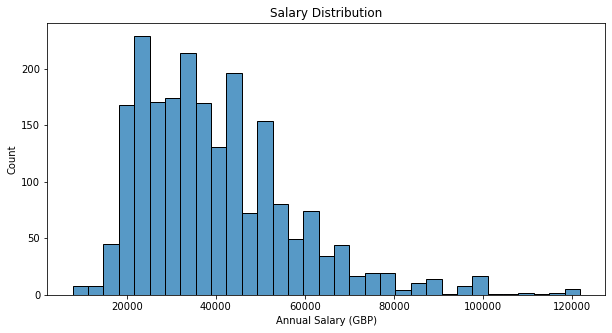

In [39]:
# SalePrice distribution plot
plt.figure(figsize=[10,5])
sns.histplot(df_jobs['salary'])

plt.title('Salary Distribution')
plt.xlabel('Annual Salary (GBP)')
plt.ylabel('Count')
plt.show()

In [40]:
# discuss graph
median_salary

36008.0

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [41]:
## YOUR CODE HERE

##### 1. Start by ONLY using the location as a feature.

In [42]:
# First let me see how many unique locations I have:
df_jobs.location.unique()

array(['London', 'London SE1 0AT', 'Birmingham', 'Birmingham B2',
       'Stafford', 'Worcester•Remote', 'London•Remote',
       'London•Temporarily Remote', 'London WC2H•Remote', 'London W1K',
       'London W1B 5AN', 'London SW1Y•Temporarily Remote', 'London EC4Y',
       'London+1 location', 'London SW19 4JS', 'London N8 8PL•Remote',
       'London E1 4DG', 'London W2 6LA', 'London EC2A 4EG•Remote',
       'London EC1V', 'London SE1 3LE•Remote', 'London EC4R',
       'London EC1V 9BJ', 'London EC4V 4EG',
       'London SW9 6DE•Temporarily Remote', 'London SE1 4YB',
       'London E14 5RE•Temporarily Remote', 'London EC3R',
       'London SE1 7QP•Temporarily Remote', 'London SW1Y 6HD',
       'London E14', 'London SE1 6LH', 'Croydon CR9', 'Victoria',
       'North London', 'London SW1E 5NN•Remote', 'London WC2H',
       'London EC3V 9DU', 'Henley in Arden', 'Leamington Spa',
       'Atherstone CV9 2SQ', 'Warwick CV34 6DA', 'Coventry+1 location',
       'Birmingham•Remote', 'Birmingha

In [43]:
df_jobs.location.nunique()

760

In [44]:
cities = ['London', 'Birmingham', 'Glasgow', 'Liverpool', 'Bristol', 
          'Manchester', 'Sheffield', 'Leeds', 'Edinburgh', 'Leicester', 
          'Coventry', 'Bradford', 'Cardiff', 'Belfast', 'Nottingham',
          'Kingston', 'Newcastle', 'Derby', 'Portsmouth', YOUR_CITY]

In [45]:
cities

['London',
 'Birmingham',
 'Glasgow',
 'Liverpool',
 'Bristol',
 'Manchester',
 'Sheffield',
 'Leeds',
 'Edinburgh',
 'Leicester',
 'Coventry',
 'Bradford',
 'Cardiff',
 'Belfast',
 'Nottingham',
 'Kingston',
 'Newcastle',
 'Derby',
 'Portsmouth',
 'Southampton']

In [46]:
len(cities)

20

In [47]:
df_jobs.head()

,location,company,job_title,salary,high_salary
2,London,ByteDance,Machine Learning Engineer - Recommendation,63345,1
5,London SE1 0AT,Fable Data,Data Scientist,55000,1
18,London,Karshare,Business Intelligence Engineer,45000,1
19,London,Graduate Recruitment Bureau,Graduate Technical Analyst and Support Engineer,26000,0
35,Birmingham,Openreach,Data Scientist,65000,1


In [48]:
# So I have many more unique locations than those cities I originally requested.
# I will clean the locations based on my original "cities" list:

In [49]:
pat = r'\b(?:{})\b'.format('|'.join(cities))
df_jobs['city'] = df_jobs['location'].str.findall('('+ pat +')').str.join('')

In [50]:
df_jobs.head(10)

,location,company,job_title,salary,high_salary,city
2,London,ByteDance,Machine Learning Engineer - Recommendation,63345,1,London
5,London SE1 0AT,Fable Data,Data Scientist,55000,1,London
18,London,Karshare,Business Intelligence Engineer,45000,1,London
19,London,Graduate Recruitment Bureau,Graduate Technical Analyst and Support Engineer,26000,0,London
35,Birmingham,Openreach,Data Scientist,65000,1,Birmingham
36,Birmingham B2,Axa,Data Scientist,50000,1,Birmingham
47,Stafford,Codeweavers,Lead Analytics Engineer,60000,1,
48,Worcester•Remote,Searchability,BI Developer / Automation Engineer,60000,1,
52,London,Freedom from Torture,Data Scientist,39120,1,London
78,London•Remote,Talenting,Data Scientist - suit recent PhD (London based...,52500,1,London


In [51]:
df_jobs.city.unique()

array(['London', 'Birmingham', '', 'Coventry', 'Glasgow', 'Liverpool',
       'Manchester', 'Bristol', 'Sheffield', 'Bradford', 'Leeds',
       'Edinburgh', 'Derby', 'Nottingham', 'Leicester', 'Cardiff',
       'Belfast', 'Newcastle', 'Portsmouth', 'Southampton', 'Kingston'],
      dtype=object)

In [52]:
df_jobs.city.nunique()

21

In [53]:
df_jobs.city.value_counts()

               791
London         349
Manchester     137
Bristol        135
Leeds          120
Birmingham     109
Glasgow         63
Edinburgh       59
Nottingham      51
Newcastle       42
Cardiff         41
Sheffield       40
Liverpool       36
Coventry        35
Leicester       29
Belfast         29
Southampton     28
Bradford        16
Portsmouth      15
Derby           14
Kingston         3
Name: city, dtype: int64

In [54]:
df_jobs = df_jobs[df_jobs.city != '']

In [55]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 2 to 57704
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     1351 non-null   object
 1   company      1351 non-null   object
 2   job_title    1351 non-null   object
 3   salary       1351 non-null   int64 
 4   high_salary  1351 non-null   int64 
 5   city         1351 non-null   object
dtypes: int64(2), object(4)
memory usage: 73.9+ KB


In [56]:
df_jobs.head()

,location,company,job_title,salary,high_salary,city
2,London,ByteDance,Machine Learning Engineer - Recommendation,63345,1,London
5,London SE1 0AT,Fable Data,Data Scientist,55000,1,London
18,London,Karshare,Business Intelligence Engineer,45000,1,London
19,London,Graduate Recruitment Bureau,Graduate Technical Analyst and Support Engineer,26000,0,London
35,Birmingham,Openreach,Data Scientist,65000,1,Birmingham


##### 2. Use at least two different classifiers you find suitable.

- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.


In [57]:
# target and predictors
X = df_jobs[['city']]
y = df_jobs['high_salary']

In [58]:
# dummify cities
X_dummy = pd.get_dummies(X, drop_first=True)

In [59]:
# get train-test split
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=42)

In [60]:
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression Model

In [61]:
# create a logistic regression model instance
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# fit and evaluate the data on the whole training set
logreg.fit(X_train, y_train)

# get cross validated scores
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# evaluate data on the train and test set
print("Training Score:", logreg.score(X_train, y_train))
print("Test Score:", logreg.score(X_test, y_test))

Cross-validated training scores: [0.56944444 0.5462963  0.53240741 0.52314815 0.5787037 ]
Mean cross-validated training score: 0.55
Training Score: 0.5879629629629629
Test Score: 0.5276752767527675


In [62]:
logreg_coefs = pd.DataFrame({'variable': X_dummy.columns,
                            'coef': logreg.coef_[0],
                            'abs_coef': np.abs(logreg.coef_[0])})

logreg_coefs.sort_values('abs_coef', inplace=True, ascending=False)
logreg_coefs

,variable,coef,abs_coef
12,city_London,0.272541,0.272541
11,city_Liverpool,0.192593,0.192593
8,city_Kingston,-0.160195,0.160195
0,city_Birmingham,0.157998,0.157998
2,city_Bristol,0.109196,0.109196
1,city_Bradford,0.093739,0.093739
3,city_Cardiff,-0.074367,0.074367
16,city_Portsmouth,-0.066924,0.066924
5,city_Derby,-0.066924,0.066924
13,city_Manchester,0.054533,0.054533


#### Decision Tree Classifier

In [63]:
# create a decision tree classification model instance
from sklearn.tree import DecisionTreeClassifier
dectrec = DecisionTreeClassifier()

# fit and evaluate the data on the whole training set
dectrec.fit(X_train, y_train)

# get cross validated scores
scores = cross_val_score(dectrec, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# evaluate data on the train and test set
print("Training Score:", dectrec.score(X_train, y_train))
print("Test Score:", dectrec.score(X_test, y_test))

Cross-validated training scores: [0.56481481 0.56018519 0.53240741 0.52314815 0.5787037 ]
Mean cross-validated training score: 0.5518518518518518
Training Score: 0.5879629629629629
Test Score: 0.5276752767527675


In [64]:
pd.DataFrame(list(zip(X_dummy.columns, dectrec.feature_importances_)), 
             columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

,Feature,Importance
12,city_London,0.281720
11,city_Liverpool,0.188308
0,city_Birmingham,0.128209
3,city_Cardiff,0.077077
1,city_Bradford,0.056118
2,city_Bristol,0.054827
5,city_Derby,0.047420
16,city_Portsmouth,0.045285
8,city_Kingston,0.033909
14,city_Newcastle,0.033473


#### Random Forest Classifier

In [65]:
# create a random forest classification model instance
from sklearn.ensemble import RandomForestClassifier
ranforc = RandomForestClassifier()

# fit and evaluate the data on the whole training set
ranforc.fit(X_train, y_train)

# get cross validated scores
scores = cross_val_score(ranforc, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# evaluate data on the train and test set
print("Training Score:", ranforc.score(X_train, y_train))
print("Test Score:", ranforc.score(X_test, y_test))

Cross-validated training scores: [0.58333333 0.5462963  0.53240741 0.52314815 0.5787037 ]
Mean cross-validated training score: 0.5527777777777778
Training Score: 0.5879629629629629
Test Score: 0.5276752767527675


In [66]:
pd.DataFrame(list(zip(X_dummy.columns, ranforc.feature_importances_)), 
             columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

,Feature,Importance
12,city_London,0.166709
11,city_Liverpool,0.102021
3,city_Cardiff,0.096641
0,city_Birmingham,0.073665
16,city_Portsmouth,0.065261
5,city_Derby,0.056350
9,city_Leeds,0.054682
14,city_Newcastle,0.054466
1,city_Bradford,0.050540
7,city_Glasgow,0.046141


The models all have approximately the same mean cv score around 0.55. This is marginally better than the baseline score of 0.5. However at this point we are only using a single feature, the location.

In [67]:
# explain The coefficient/feature importance

#### 3. Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.

Some interesting features that can be extracted from the job title include position and level (grade). 

These are defined below in separate lists.

In [68]:
positions = {'Scientist', 'Analyst', 'Consultant', 'Engineer', 'Architect',
             'Developer', 'Professor'}

In [69]:
def position_finder(x):
    """Extracts position from job_title"""
    """Note: position must be in positions set"""
    df_positions = set(x.split(' '))
    extract_positions = positions.intersection(df_positions)
    return ', '.join(extract_positions)

In [70]:
df_jobs['position'] = df_jobs['job_title'].apply(position_finder)

In [71]:
levels = {'Graduate', 'Postgraduate', 'Entry', 'Junior', 'Senior', 'Associate', 'Manager', 'Lead', 'Principal', 'Specialist'} 

In [72]:
def level_finder(x):
    """Extracts level from job_title"""
    """Note: level must be in levels set"""
    df_levels = set(x.split(' '))
    extract_levels = levels.intersection(df_levels)
    return ', '.join(extract_levels)

In [73]:
df_jobs['level'] = df_jobs['job_title'].apply(level_finder)

In [74]:
df_jobs.head()

,location,company,job_title,salary,high_salary,city,position,level
2,London,ByteDance,Machine Learning Engineer - Recommendation,63345,1,London,Engineer,
5,London SE1 0AT,Fable Data,Data Scientist,55000,1,London,Scientist,
18,London,Karshare,Business Intelligence Engineer,45000,1,London,Engineer,
19,London,Graduate Recruitment Bureau,Graduate Technical Analyst and Support Engineer,26000,0,London,"Analyst, Engineer",Graduate
35,Birmingham,Openreach,Data Scientist,65000,1,Birmingham,Scientist,


In [75]:
df_jobs['position'].value_counts()

Analyst                  435
                         380
Consultant               211
Engineer                 140
Scientist                108
Developer                 52
Professor                  4
Analyst, Consultant        4
Architect                  4
Scientist, Engineer        3
Developer, Engineer        2
Analyst, Engineer          1
Developer, Consultant      1
Developer, Analyst         1
Scientist, Analyst         1
Consultant, Architect      1
Scientist, Consultant      1
Analyst, Developer         1
Engineer, Architect        1
Name: position, dtype: int64

In [76]:
df_jobs['level'].value_counts()

                         908
Senior                   178
Junior                    65
Manager                   58
Lead                      39
Graduate                  38
Associate                 16
Specialist                12
Principal                  8
Senior, Manager            7
Associate, Senior          5
Graduate, Junior           4
Junior, Manager            4
Entry                      3
Principal, Specialist      2
Postgraduate               2
Senior, Specialist         1
Manager, Lead              1
Name: level, dtype: int64

#### 4. Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [77]:
# target and predictors
Xn = df_jobs[['city', 'position', 'level']]
yn = df_jobs['high_salary']

In [78]:
# dummify cities
Xn_dummy = pd.get_dummies(Xn, drop_first=True)
# Xn_dummy = Xn_dummy.drop(['position_','level_'], axis=1)

In [79]:
# get train-test split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn_dummy, yn, test_size=0.2, random_state=42)

In [80]:
# standardize features
Xn_train = scaler.fit_transform(Xn_train)
Xn_test = scaler.transform(Xn_test)

#### Logistic Regression Model

In [81]:
# create a logistic regression model instance
logregn = LogisticRegression(random_state=42)

# fit and evaluate the data on the whole training set
logregn.fit(Xn_train, yn_train)

# get cross validated scores
scores = cross_val_score(logregn, Xn_train, yn_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# evaluate data on the train and test set
print("Training Score:", logregn.score(Xn_train, yn_train))
print("Test Score:", logregn.score(Xn_test, yn_test))

Cross-validated training scores: [0.69907407 0.70833333 0.66666667 0.68981481 0.66203704]
Mean cross-validated training score: 0.6851851851851852
Training Score: 0.7166666666666667
Test Score: 0.6863468634686347


In [82]:
# tune model using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [83]:
# gridsearch params
logr_params = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'C': np.logspace(-4, 4, 9)
}

# set the gridsearch
model_logr = LogisticRegression(random_state=42)
logr_gs = GridSearchCV(model_logr, logr_params, cv=5,
                      verbose=1, n_jobs=-2, return_train_score=True)

# use the gridearch model to fit the data
logr_gs.fit(Xn_train, yn_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-2,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, verbose=1)

In [84]:
# assign your best estimator to a variable
logr_best = logr_gs.best_estimator_

# print out the best parameters
print(logr_gs.best_params_)
# print out the best mean cross-validated score
print("Best Mean CV score:", logr_gs.best_score_)
# print out the best testing score
print("Best Test score:", logr_gs.score(Xn_test, yn_test))

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Mean CV score: 0.6944444444444444
Best Test score: 0.6863468634686347


In [85]:
logregn_coefs = pd.DataFrame({'variable': Xn_dummy.columns,
                            'coef': logr_best.coef_[0],
                            'abs_coef': np.abs(logr_best.coef_[0])})

logregn_coefs.sort_values('abs_coef', inplace=True, ascending=False)
logregn_coefs.head(10)

,variable,coef,abs_coef
40,level_Graduate,-0.669082,0.669082
30,position_Engineer,0.527167,0.527167
33,position_Scientist,0.467612,0.467612
50,level_Senior,0.445835,0.445835
44,level_Lead,0.441971,0.441971
42,level_Junior,-0.410980,0.410980
12,city_London,0.347114,0.347114
26,position_Developer,0.291256,0.291256
41,"level_Graduate, Junior",-0.268297,0.268297
48,level_Principal,0.257543,0.257543


#### Decision Tree Classifier

In [86]:
# create a decision tree classification model instance
dectrecn = DecisionTreeClassifier(random_state=42)

# fit and evaluate the data on the whole training set
dectrecn.fit(Xn_train, yn_train)

# get cross validated scores
scores = cross_val_score(dectrecn, Xn_train, yn_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# evaluate data on the train and test set
print("Training Score:", dectrecn.score(Xn_train, yn_train))
print("Test Score:", dectrecn.score(Xn_test, yn_test))

Cross-validated training scores: [0.65277778 0.66203704 0.6712963  0.65740741 0.64814815]
Mean cross-validated training score: 0.6583333333333334
Training Score: 0.774074074074074
Test Score: 0.6383763837638377


In [87]:
# gridsearch params
dtc_params = {
    'max_depth': [None]+list(range(1, 10)),
    'max_features': ['auto','sqrt','log2'],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20],
    'ccp_alpha': [0, 0.0001, 0.001, 0.005, 0.01]
}

# set the gridsearch
model_dtc = DecisionTreeClassifier(random_state=42)
dtc_gs = GridSearchCV(model_dtc, dtc_params, cv=5,
                      verbose=1, n_jobs=-2, return_train_score=True)

# use the gridearch model to fit the data
dtc_gs.fit(Xn_train, yn_train)

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-2,
             param_grid={'ccp_alpha': [0, 0.0001, 0.001, 0.005, 0.01],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 10, 15, 20]},
             return_train_score=True, verbose=1)

In [88]:
# assign your best estimator to a variable
dtc_best = dtc_gs.best_estimator_

# print out the best parameters
print(dtc_gs.best_params_)
# print out the best mean cross-validated score
print("Best Mean CV score:", dtc_gs.best_score_)
# print out the best testing score
print("Best Test score:", dtc_gs.score(Xn_test, yn_test))

{'ccp_alpha': 0.001, 'max_depth': None, 'max_features': 'auto', 'min_samples_split': 20}
Best Mean CV score: 0.6685185185185186
Best Test score: 0.6457564575645757


In [89]:
pd.DataFrame(list(zip(Xn_dummy.columns, dtc_best.feature_importances_)), 
             columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
40,level_Graduate,0.145039
30,position_Engineer,0.125989
42,level_Junior,0.114318
33,position_Scientist,0.078225
44,level_Lead,0.056556
50,level_Senior,0.053203
12,city_London,0.052643
45,level_Manager,0.042219
11,city_Liverpool,0.038868
26,position_Developer,0.038466


#### Random Forest Classifier

In [90]:
# create a random forest classification model instance
ranforcn = RandomForestClassifier(random_state=42)

# fit and evaluate the data on the whole training set
ranforcn.fit(Xn_train, yn_train)

# get cross validated scores
scores = cross_val_score(ranforcn, Xn_train, yn_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# evaluate data on the train and test set
print("Training Score:", ranforcn.score(Xn_train, yn_train))
print("Test Score:", ranforcn.score(Xn_test, yn_test))

Cross-validated training scores: [0.61111111 0.65277778 0.68055556 0.68055556 0.65740741]
Mean cross-validated training score: 0.6564814814814814
Training Score: 0.774074074074074
Test Score: 0.6531365313653137


In [91]:
# gridsearch params
rfc_params = {
    'n_estimators': [50, 100],
    'max_depth': [None]+list(range(1, 10)),
    'max_features': ['auto','sqrt','log2'],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25]
}

# set the gridsearch
model_rfc = RandomForestClassifier(random_state=42)
rfc_gs = GridSearchCV(model_rfc, rfc_params, cv=5,
                      verbose=1, n_jobs=-2, return_train_score=True)

# use the gridearch model to fit the data
rfc_gs.fit(Xn_train, yn_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-2,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25],
                         'n_estimators': [50, 100]},
             return_train_score=True, verbose=1)

In [92]:
# assign your best estimator to a variable
rfc_best = rfc_gs.best_estimator_

# print out the best parameters
print(rfc_gs.best_params_)
# print out the best mean cross-validated score
print("Best Mean CV score:", rfc_gs.best_score_)
# print out the best testing score
print("Best Test score:", rfc_gs.score(Xn_test, yn_test))

{'max_depth': None, 'max_features': 'log2', 'min_samples_split': 20, 'n_estimators': 100}
Best Mean CV score: 0.6824074074074075
Best Test score: 0.6642066420664207


In [93]:
pd.DataFrame(list(zip(Xn_dummy.columns, rfc_best.feature_importances_)), 
             columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
50,level_Senior,0.104881
40,level_Graduate,0.087071
30,position_Engineer,0.069155
33,position_Scientist,0.065414
42,level_Junior,0.056022
19,position_Analyst,0.052317
44,level_Lead,0.042137
26,position_Developer,0.036699
12,city_London,0.036024
24,position_Consultant,0.035975


The 'location' feature does not seem to be as important as the 'level' and 'position' features I defined. The most important features across all three models were:
- level = Senior/Graduate,
- position = Engineer/Scientist, and
- location = London (Liverpool made it into the top 10 features for the Decision Tree model)

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [95]:
## YOUR CODE HERE

My best performing model was my Logistic Regression model. I will use this model moving forward.

In [96]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt

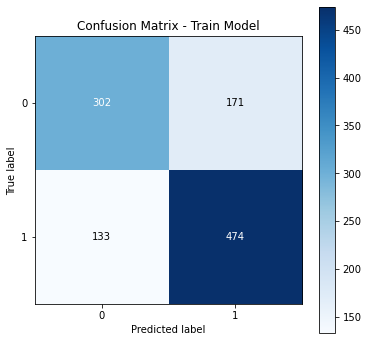

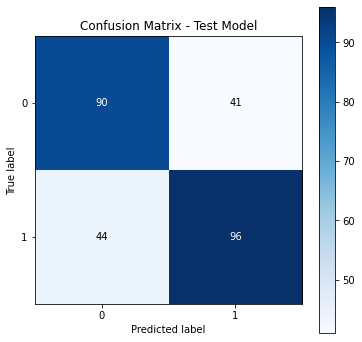

In [97]:
# Confusion matrix

#predictions
predictions_train = logr_best.predict(Xn_train)
predictions_test = logr_best.predict(Xn_test)

# plot Confusion matrix for train predictions
skplt.metrics.plot_confusion_matrix(yn_train, predictions_train, figsize=(6,6))
plt.title("Confusion Matrix - Train Model")
plt.show()
# plot Confusion matrix for train predictions
skplt.metrics.plot_confusion_matrix(yn_test, predictions_test, figsize=(6, 6))
plt.title("Confusion Matrix - Test Model")
plt.show()

In [98]:
# Accuracy score

# train score
print("Best Train score:", accuracy_score(yn_train, predictions_train))
# mean cv score
print("Best Mean CV score:", logr_gs.best_score_)
# test score
print("Best Test score:", accuracy_score(yn_test, predictions_test))

Best Train score: 0.7185185185185186
Best Mean CV score: 0.6944444444444444
Best Test score: 0.6863468634686347


In [99]:
# Classification report

# for train model
print("TRAIN MODEL:\n", classification_report(yn_train, predictions_train), "\n")
# for test model
print("TEST MODEL:\n", classification_report(yn_test, predictions_test))

TRAIN MODEL:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67       473
           1       0.73      0.78      0.76       607

    accuracy                           0.72      1080
   macro avg       0.71      0.71      0.71      1080
weighted avg       0.72      0.72      0.72      1080
 

TEST MODEL:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       131
           1       0.70      0.69      0.69       140

    accuracy                           0.69       271
   macro avg       0.69      0.69      0.69       271
weighted avg       0.69      0.69      0.69       271



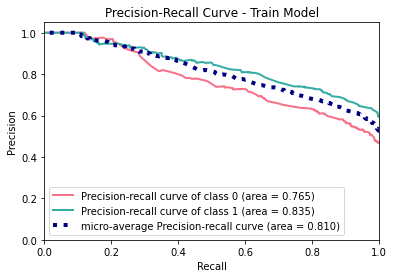

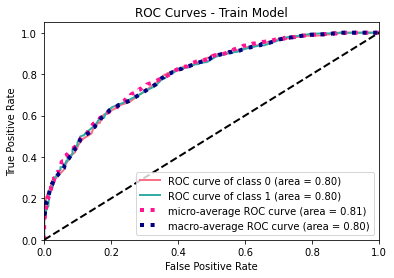

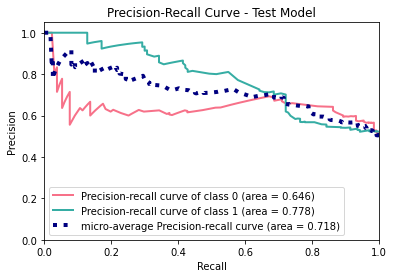

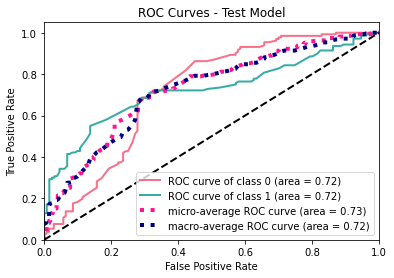

In [100]:
# Precision-recall and ROC curve

# probabilities
probabilities_train = logr_best.predict_proba(Xn_train)
probabilities_test = logr_best.predict_proba(Xn_test)

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(logr_best.classes_)))

# Precision-Recall Curve for train probabilities
skplt.metrics.plot_precision_recall(yn_train, probabilities_train, cmap=cmap)
plt.title("Precision-Recall Curve - Train Model")
plt.show()

# ROC Curves for train probabilities
skplt.metrics.plot_roc(yn_train, probabilities_train, cmap=cmap)
plt.title("ROC Curves - Train Model")
plt.show()

# Precision-Recall Curve for test probabilities
skplt.metrics.plot_precision_recall(yn_test, probabilities_test, cmap=cmap)
plt.title("Precision-Recall Curve - Test Model")
plt.show()

# ROC Curves for test probabilities
skplt.metrics.plot_roc(yn_test, probabilities_test, cmap=cmap)
plt.title("ROC Curves - Test Model")
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [140]:
## YOUR CODE HERE

#### Increase the threshold for predicting a lower salary job.

Right now the classifier is choosing to label low salary versus high salary based on the 0.5 predicted probability threshold. 


In [134]:
# Get the predicted probabilities and explicitly name the columns:
Y_pp = pd.DataFrame(logr_best.predict_proba(Xn_train), 
             columns=['low_salary', 'high_salary'])
Y_pp.head()

,low_salary,high_salary
0,0.126237,0.873763
1,0.344396,0.655604
2,0.999092,0.000908
3,0.604781,0.395219
4,0.627579,0.372421


In [135]:
def predict_at_threshold(x, threshold=0.5):
    if x <= threshold:
        return 1
    else:
        return 0

In [136]:
# Create a new column with predicted labels where the threshold
#  for labeling class is 80% rather than 50%.
Y_pp['pred_class_thresh'] = Y_pp['low_salary'].apply(predict_at_threshold, 
                                                threshold=0.2)

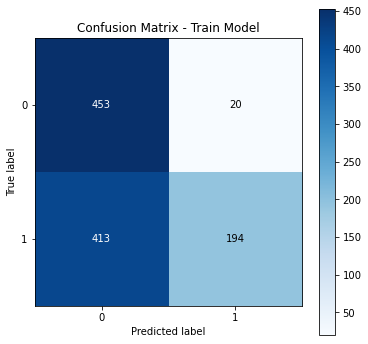

In [137]:
# plot Confusion matrix for train predictions
skplt.metrics.plot_confusion_matrix(yn_train, Y_pp.pred_class_thresh, figsize=(6,6))
plt.title("Confusion Matrix - Train Model")
plt.show()

In [138]:
# Accuracy score

# train score
print("Train score:", accuracy_score(yn_train, Y_pp.pred_class_thresh))

Train score: 0.5990740740740741


In [139]:
# Classification report

# for train model
print("TRAIN MODEL:\n", classification_report(yn_train, Y_pp.pred_class_thresh))

TRAIN MODEL:
               precision    recall  f1-score   support

           0       0.52      0.96      0.68       473
           1       0.91      0.32      0.47       607

    accuracy                           0.60      1080
   macro avg       0.71      0.64      0.57      1080
weighted avg       0.74      0.60      0.56      1080



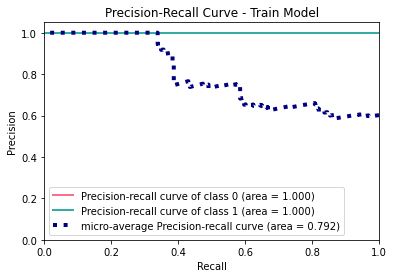

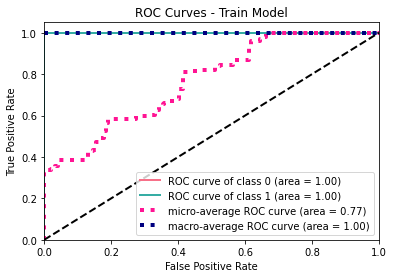

In [128]:
# Precision-recall and ROC curve

# probabilities
probabilities_train = logr_best.predict_proba(Xn_train)

# Precision-Recall Curve for train probabilities
skplt.metrics.plot_precision_recall(Y_pp['pred_class_thresh'], probabilities_train, cmap=cmap)
plt.title("Precision-Recall Curve - Train Model")
plt.show()

# ROC Curves for train probabilities
skplt.metrics.plot_roc(Y_pp['pred_class_thresh'], probabilities_train, cmap=cmap)
plt.title("ROC Curves - Train Model")
plt.show()

`Precision = TP / (TP + FP)`

`Recall = TP / (TP + FN)`

The tradeoff with telling a client incorrectly that they would get a lower salary job over telling a client incorrectly that they would get a high salary job, is that the model recall (The ability of the classifier to correctly identify the current class) increases at the expense of the model precision (The ability of the classifier to avoid labeling a class as a member of another class).

If the number of FN values decreases (and the value of FP increases), model recall increases while model precision decreases.

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

In [109]:
## YOUR TEXT HERE IN MARKDOWN FORMAT 

### Predicting Salaries of UK-based Data Science Jobs

The project required us to determine the factors that are most important in predicting the salary of data-related job postings (e.g., data scientist, data analyst). I limited my search to job postings in the UK only, including cities across England, Scotland, Wales and Northern Ireland.


Although a regression model would be the most appropriate to predict salary, the project requested we make it into a binary classification problem – whether the salary was low or high – and work with a classification model to investigate which factors can predict whether the salary based on a specific job specification is low or high. As we only have two classes, the baseline model accuracy is 50% (Guessing whether the salary is low or high without any modeling would ensure you are correct half the time, on average).


In order to obtain the necessary data, I prepared a web-scraper to obtain information from uk.indeed.com. I was able to extract the following information: job location, hiring company, job title including a brief job description, and the salary.


Once the data was collected, it was cleaned using various techniques learned throughout the course. Although I was initially able to scrape nearly 60,000 data points, after cleaning I was left with just more than 1,300. This was largely due to many duplicated data points, and entries with missing or irrelevant information among other factors. The number of useable data points was deemed sufficient to build predictive models to complete the project.


I built three separate classification models in order to compare the results between models, and also to use my best performing model to investigate the data further to obtain additional insights. My best performing model obtained a score around 70%, which is a significant improvement from the baseline accuracy.


I was able to obtain the most important features that can allow the salary to be predicted, which included:
- job level = Senior, Graduate, Junior, and
- job position = Data Engineer, Data Scientist, and Data Analyst
- The location of the job was not a particularly useful predictor, although there did seem to be a small effect whether the job was based in London or not.


We were also required to tune our models so that we would have higher confidence in telling someone incorrectly that they would get a lower salary job over telling them incorrectly that they would get a high salary job. The tradeoff with this is that ‘peace-of-mind’ is gained at the expense of precision.


Overall, the project was challenging but allowed me to work on my data science skills. There are two key things I would have done differently if I had the opportunity:
1.	I would take the job summary/description into account, using NLP to analyze different keywords and perhaps obtain additional features to predict salary,
2.	I should have paid more attention to the different cities and job titles my web-scraper included and filtered as there were too many unique cities and titles to provide meaningful insights to be obtained. 


Finally, and for those interested, as of January 2022 the median UK salary was slightly higher than £36,000 considering all factors affecting salary (location, experience, position etc.). The minimum advertised salary was £7,800 and the maximum was £121,800.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [110]:
## YOUR LINK HERE IN MARKDOWN FORMAT 